In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['ps.fonttype'] = 42
rcParams['ps.useafm'] = True
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['savefig.dpi'] = 300  # Ensure a high resolution

In [3]:
hue_color_adjusted = True
hue_colors = ['tab:blue', 'tab:orange']
import seaborn as sns
def _get_brighter_color(color: str):
    new_color = sns.set_hls_values(color, l=0.7)
    # convert to hex string
    color_string = f"#{''.join([f'{int(val*255):02x}' for val in new_color])}"
    return color_string


if hue_color_adjusted:
    hue_colors = [_get_brighter_color(color) for color in hue_colors]

print(hue_colors)

['#7cbce8', '#ffad65']


In [4]:
from catrace.dataset import load_dataset_config
dataset_name = 'juvenile'
config_file = f'../dataset_configs/{dataset_name}_dataset.json'
dsconfig = load_dataset_config(config_file)

from analysis_config import juvenile_window_name_to_frames
window_name = 'time_window_5s'
window = juvenile_window_name_to_frames[window_name]



Plotting average trace...
2021-07-15-DpOBEM-N2_Dp None
Computing distance matrices...


2021-07-15-DpOBEM-N2_Dp2021-12-10-DpOBEM-N4_Dp2022-02-20-DpOBEM-N11_Dp2022-02-13-DpOBEM-N10_Dp2021-03-18-DpOBEM-JH10_Dp2021-12-31-DpOBEM-N7_Dp2021-03-19-DpOBEM-JH10_Dp2021-05-01-DpOBEM-JH13_Dp2021-05-22-DpOBEM-JH14_Dp2021-07-16-DpOBEM-N3_Dp2021-04-03-DpOBEM-JH11_Dp2021-02-05-DpOBEM-JH9_Dp 2021-04-02-DpOBEM-JH11_Dp2021-09-17-DpOBEM-JH20_Dp 2021-09-18-DpOBEM-JH20_Dp  2021-07-31-DpOBEM-JH17_Dp2021-09-15-DpOBEM-JH20_Dp2021-07-30-DpOBEM-JH17_Dp      None 2021-09-03-DpOBEM-JH18_Dp2021-09-02-DpOBEM-JH18_Dp   None   NoneNoneNoneNoneNone NoneNoneNone
NoneNoneNone

 
NoneNone

 None
None
None
None



None






2021-09-29-DpOBEM-JH21_Dp2021-09-04-DpOBEM-JH18_Dp  2021-10-01-DpOBEM-JH21_DpNone 
None
None
2021-10-02-DpOBEM-JH21_Dp2021-10-14-DpOBEM-JH22_Dp  2021-11-10-DpOBEM-JH23_DpNone 
None
None
2021-11-14-DpOBEM-JH23_Dp2021-11-24-DpOBEM-JH24_Dp2021-11-11-DpOBEM-JH23_Dp2021-11-27-DpOBEM-JH24_Dp2021-11-26-DpOBEM-JH24_Dp    None NoneNone

None

None
2021-07-15-DpOBEM-N2_Dp 2021-07-16-DpOBEM-N3_Dp202

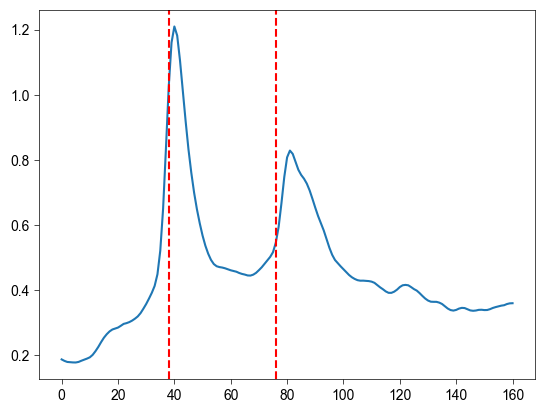

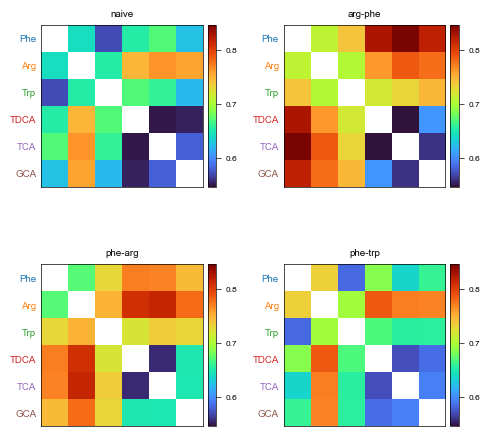

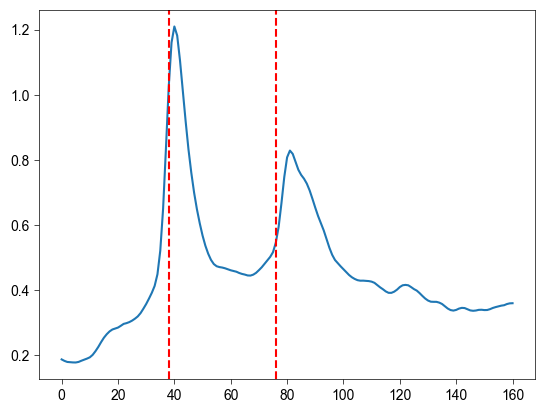

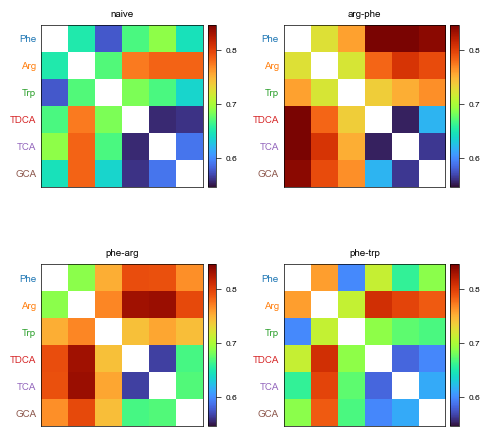

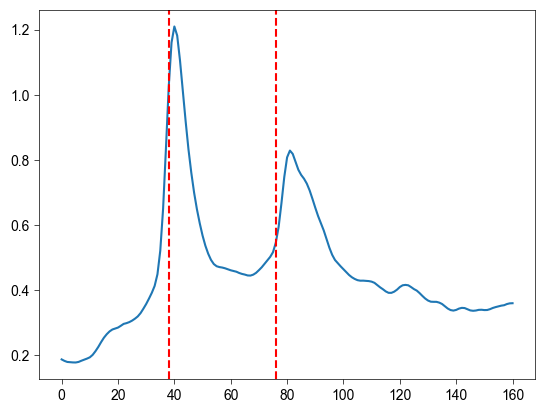

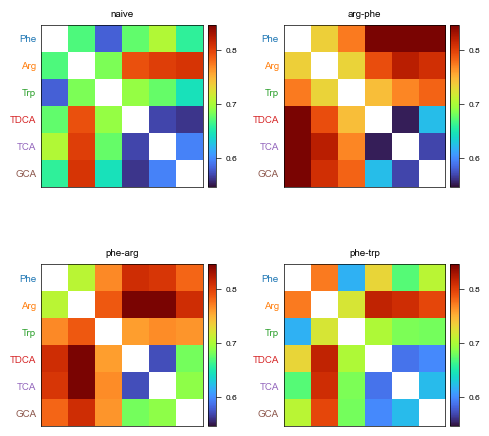

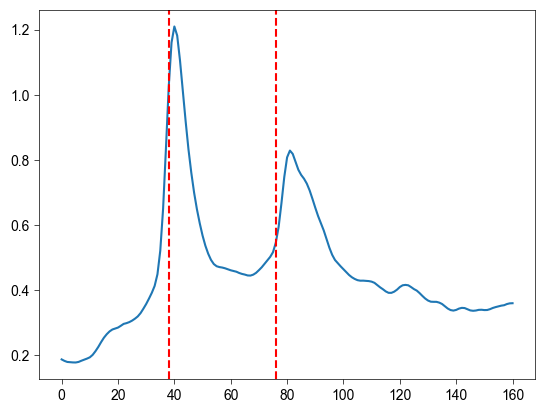

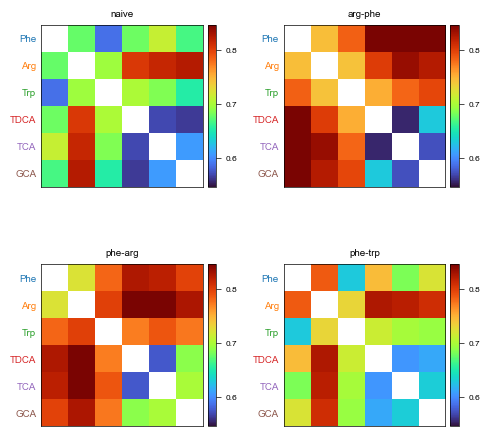

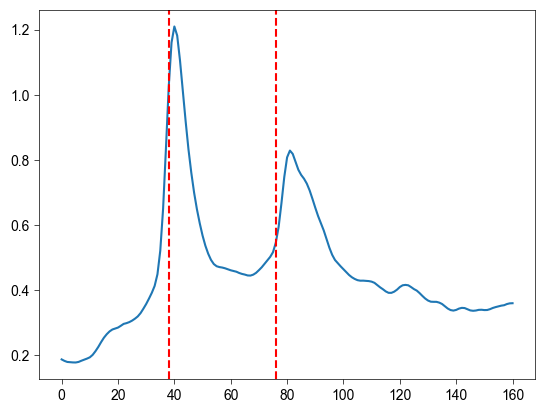

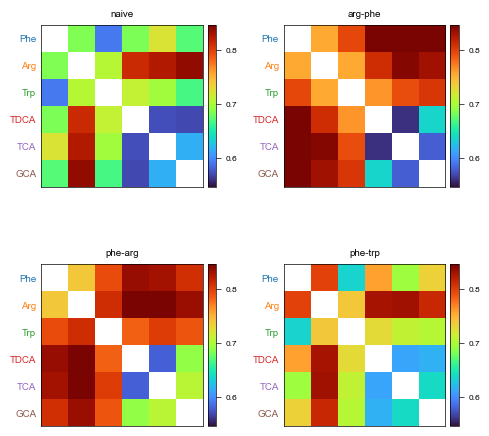

In [7]:
from catrace.run.run_distance import run_distance, RunDistanceParams, PlotDistanceParams, PlotPerCondMatParams, PlotMeanDeltaMatParams
from catrace.run.run_linear_separability import (  # <<< MODIFIED (LDA -> SVM)
    run_linear_separability_manifold_pair,          # <<< MODIFIED (LDA -> SVM)
    RunLinearSeparabilityManifoldPairParams,        # <<< MODIFIED (LDA -> SVM)
    ComputeLinearSeparabilityManifoldPairParams,    # <<< MODIFIED (LDA -> SVM)
)                                                  # <<< MODIFIED (LDA -> SVM)
from catrace.linear_separability import ClassifierCrossValParameters  # <<< MODIFIED (LDA -> SVM)

from catrace.visualize import PlotBoxplotMultiOdorCondParams
ylabels = None
ylabel_colors = None
hue_color_adjusted = False
hue_colors = ['tab:blue', 'tab:orange']
strip_hue_colors = ['gray', 'gray']
mean_hue_colors = ['tab:blue', 'tab:orange']
import seaborn as sns
def _get_brighter_color(color: str, l=0.85):
    new_color = sns.set_hls_values(color, l=0.85)
    return new_color
if hue_color_adjusted:
    hue_colors = [_get_brighter_color(color) for color in hue_colors]
    strip_hue_colors = [_get_brighter_color(color) for color in strip_hue_colors]
    mean_hue_colors = [_get_brighter_color(color, l=0.6) for color in mean_hue_colors]
plot_params = PlotDistanceParams(
    per_cond = PlotPerCondMatParams(
        row_height=2.5,#1.35,
        col_width=2.5,#1.35,
        title_fontsize=7,
        ylabel_fontsize=7,
        ylabel_colors = ylabel_colors,
        ylabels = ylabels,
        cbar_interval=0.1,
        clim = None,),
    mean_delta = PlotMeanDeltaMatParams(
        figsize=(2.5, 2.5),#(1.6, 1.6),
        colorbar_fontsize = 7,
        ylabel_fontsize = 7,
        ylabels = ylabels,
        ylabel_colors = ylabel_colors
    ),
    vs_measure = PlotBoxplotMultiOdorCondParams(
        figsize=(3.8, 1.8),
        label_fontsize=7,
        show_ns=True,
        box_linewidth=1,
        strip_size=0.5,
        mean_marker_size=1,
        pvalue_marker_xoffset=0.05,
        ylim=None,#(0, 935.6151218959913),
        hue_colors=hue_colors,
        strip_hue_colors=strip_hue_colors,
        mean_hue_colors=mean_hue_colors,
    )
)


params = RunLinearSeparabilityManifoldPairParams(  # <<< MODIFIED (LDA -> SVM)
    config_file = config_file,
    compute_params = ComputeLinearSeparabilityManifoldPairParams(  # <<< MODIFIED (LDA -> SVM)
        in_dir = '',
        exp_list = dsconfig.exp_list,
        cross_val_params = ClassifierCrossValParameters(  # <<< MODIFIED (LDA -> SVM)
            model='svm',           # <<< MODIFIED (LDA -> SVM)
            k=3,                   # <<< MODIFIED (LDA -> SVM)
            kernel='linear',       # <<< MODIFIED (LDA -> SVM)
            C=1.0,                 # <<< MODIFIED (LDA -> SVM)
            gamma='scale',         # <<< MODIFIED (LDA -> SVM)
            class_weight=None,     # <<< MODIFIED (LDA -> SVM)
            scale_for_svm=True,    # <<< MODIFIED (LDA -> SVM)
        ),
        time_window = window,
        num_repeats = 50,
        sample_size = 0, # place holder
        seed = 8989,
        overwrite_computation = False,#True,
        parallelism = 20,
        manifold_level = 'odor',
        manifold_names = dsconfig.odors_stimuli
        # metric will be set automatically inside compute_linear_separability_manifold_pair
    ),
    do_reorder_cs=True,
    odor_orders = ['cs_plus', 'cs_minus', 'aa3', 'TDCA', 'TCA', 'GCA'],
    naive_name = 'naive',
    vs_same_ylim = None,
    plot_params = plot_params,
)

sample_sizes = [200,  300, 400, 500, 600, 700]#

# TODO solve the manifold level bug here

for sample_size in sample_sizes:
    params.compute_params.sample_size = sample_size  # <<< MODIFIED (LDA -> SVM)
    try:
        output_figs, test_results = run_linear_separability_manifold_pair(params)  # <<< MODIFIED (LDA -> SVM)
    except Exception as e:
        print(f"Error for sample size {sample_size}: {e}")
        continue
